In [35]:
# Import the required libraries and dependencies
import prophet
import pandas as pd
import datetime as dt
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
# Read the data from the csv file into a Pandas Dataframe
# data_df = pd.read_csv("") - Completed
# to display display(data_df.head()) - Completed

CSIQ_df = pd.read_csv('./data/CSIQ.csv')
DQ_df = pd.read_csv('./data/DQ.csv')
ENPH_df = pd.read_csv('./data/ENPH.csv')
FSLR_df = pd.read_csv('./data/FSLR.csv')
JKS_df = pd.read_csv('./data/JKS.csv')
SEDG_df = pd.read_csv('./data/SEDG.csv')
SPWR_df = pd.read_csv('./data/SPWR.csv')


In [37]:
# Displaying DataFrames 
display(CSIQ_df.head())
display(DQ_df.head())
display(ENPH_df.head())
display(FSLR_df.head())
display(JKS_df.head())
display(SEDG_df.head())
display(SPWR_df.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,22.360001,22.540001,22.040001,22.520000,22.520000,643300
1,2020-01-03,22.190001,22.440001,21.590000,21.799999,21.799999,809600
2,2020-01-06,21.309999,22.330000,21.100000,22.320000,22.320000,938000
3,2020-01-07,22.290001,22.600000,22.219999,22.360001,22.360001,596900
4,2020-01-08,22.370001,22.709999,22.110001,22.570000,22.570000,709800


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,10.240,11.032,10.240,10.996,10.996,1278000
1,2020-01-03,10.956,11.102,10.810,10.890,10.890,879500
2,2020-01-06,10.838,10.840,10.502,10.770,10.770,621000
3,2020-01-07,10.698,10.834,10.560,10.672,10.672,475500
4,2020-01-08,10.682,10.932,10.682,10.876,10.876,773500


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,26.370001,29.350000,26.040001,29.340000,29.340000,7775400
1,2020-01-03,28.790001,29.730000,28.379999,29.290001,29.290001,4811000
2,2020-01-06,29.049999,29.660000,27.830000,29.660000,29.660000,4628800
3,2020-01-07,29.820000,30.200001,28.660000,29.990000,29.990000,5363100
4,2020-01-08,29.680000,31.500000,29.440001,31.000000,31.000000,5446100


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,56.400002,57.259998,55.959999,57.240002,57.240002,1053800
1,2020-01-03,57.110001,57.660000,56.709999,57.020000,57.020000,943700
2,2020-01-06,56.009998,56.419998,54.779999,55.830002,55.830002,1535100
3,2020-01-07,55.759998,57.310001,55.759998,56.669998,56.669998,974200
4,2020-01-08,56.860001,57.110001,56.160000,56.700001,56.700001,725700


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,22.090000,22.65,22.090000,22.49,21.518370,657300
1,2020-01-02,22.790001,23.85,22.590000,23.84,22.810047,1130300
2,2020-01-03,23.170000,23.65,22.480000,22.59,21.614050,1319300
3,2020-01-06,21.969999,22.57,21.799999,22.49,21.518370,997800
4,2020-01-07,22.650000,23.00,22.559999,22.74,21.757568,592700


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,97.000000,101.879997,96.750000,101.809998,101.809998,2154800
1,2020-01-03,100.839996,103.599998,100.019997,102.379997,102.379997,1016500
2,2020-01-06,101.370003,101.879997,98.635002,99.629997,99.629997,970800
3,2020-01-07,100.000000,102.029999,97.699997,101.790001,101.790001,834900
4,2020-01-08,101.190002,105.680000,101.190002,104.160004,104.160004,1041300


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,5.173543,5.173543,5.029470,5.127701,5.127701,2764786
1,2020-01-03,5.062213,5.094957,4.813360,4.826457,4.826457,7053366
2,2020-01-06,4.734774,4.937787,4.643091,4.891945,4.891945,5552325
3,2020-01-07,4.905043,5.094957,4.833006,5.003274,5.003274,3223344
4,2020-01-08,4.963982,5.101506,4.885396,5.029470,5.029470,4496252


In [38]:
# create a new Data frame with just the date and close columns
# new variable_df = old_df[{"Date" , "Close"}]
# CSIQ_df
csiq_df = CSIQ_df[["Date" ,"Close"]]
dq_df = DQ_df[["Date" ,"Close"]]
enph_df = ENPH_df[["Date" ,"Close"]]
fslr_df = FSLR_df[["Date" ,"Close"]]
jks_df = JKS_df[["Date" ,"Close"]]
sedg_df = SEDG_df[["Date" ,"Close"]]
spwr_df = SPWR_df[["Date" ,"Close"]]



In [39]:
# Rename the close column in this cleaning step
# new variable_df = new variable_df.rename(columns = {"Close" : "STOCK SYMBOL"})

csiq_df = csiq_df.rename(columns = {"Close" : "CSIQ_Close"})
dq_df = dq_df.rename(columns = {"Close" : "DQ_Close"})
enph_df = enph_df.rename(columns = {"Close" : "ENPH_Close"})
fslr_df = fslr_df.rename(columns = {"Close" : "FSLR_Close"})
jks_df = jks_df.rename(columns = {"Close" : "JKS_Close"})
sedg_df = sedg_df.rename(columns = {"Close" : "SEDG_Close"})
spwr_df = spwr_df.rename(columns = {"Close" : "SPWR_Close"})

In [40]:
# Displaying to ensure columns have the correct title.
display(csiq_df.head())
display(dq_df.head())
display(enph_df.head())
display(fslr_df.head())
display(jks_df.head())
display(sedg_df.head())
display(spwr_df.head())

,Date,CSIQ_Close
0,2020-01-02,22.520000
1,2020-01-03,21.799999
2,2020-01-06,22.320000
3,2020-01-07,22.360001
4,2020-01-08,22.570000


,Date,DQ_Close
0,2020-01-02,10.996
1,2020-01-03,10.890
2,2020-01-06,10.770
3,2020-01-07,10.672
4,2020-01-08,10.876


,Date,ENPH_Close
0,2020-01-02,29.340000
1,2020-01-03,29.290001
2,2020-01-06,29.660000
3,2020-01-07,29.990000
4,2020-01-08,31.000000


,Date,FSLR_Close
0,2020-01-02,57.240002
1,2020-01-03,57.020000
2,2020-01-06,55.830002
3,2020-01-07,56.669998
4,2020-01-08,56.700001


,Date,JKS_Close
0,2019-12-31,22.49
1,2020-01-02,23.84
2,2020-01-03,22.59
3,2020-01-06,22.49
4,2020-01-07,22.74


,Date,SEDG_Close
0,2020-01-02,101.809998
1,2020-01-03,102.379997
2,2020-01-06,99.629997
3,2020-01-07,101.790001
4,2020-01-08,104.160004


,Date,SPWR_Close
0,2020-01-02,5.127701
1,2020-01-03,4.826457
2,2020-01-06,4.891945
3,2020-01-07,5.003274
4,2020-01-08,5.029470


Plotting the general trends

In [52]:
csiq_df['Date'] = pd.to_datetime(csiq_df['Date'])
csiq_df['Year'] = csiq_df['Date'].dt.year
average_price_by_year = csiq_df.groupby('Year')['CSIQ_Close'].mean()

In [53]:
# Set x axis and tick locations
tick_locations = range(len(average_price_by_year))
x_labels = [str(year) for year in average_price_by_year.index]

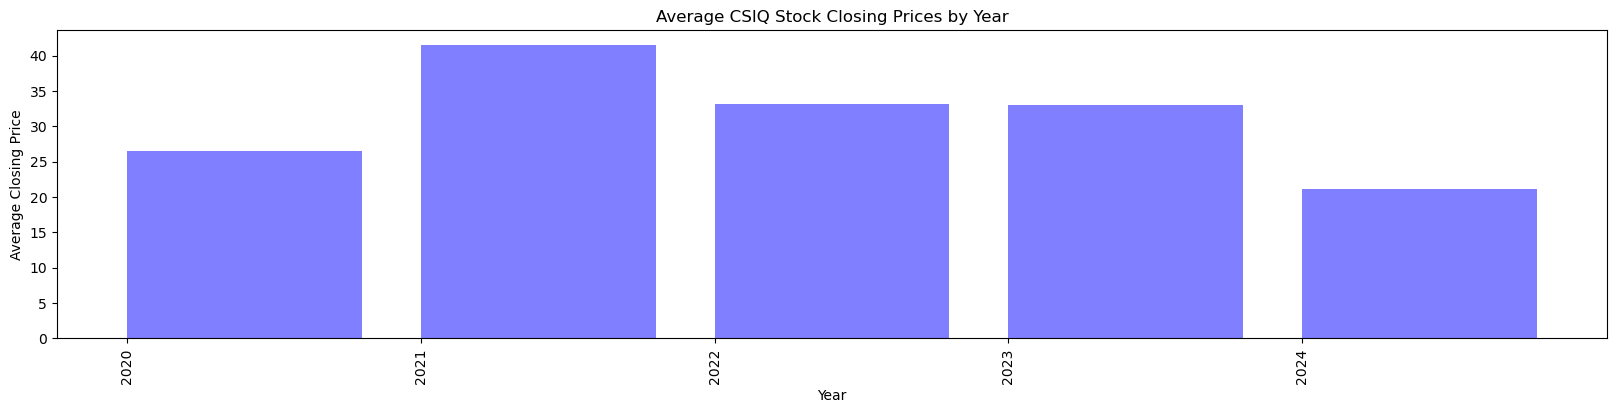

In [54]:

# Plot the DataFrame
# hourly_prices.plot()
# Lesson 07 - Data Visualizations
    # plt.figure(figsize=(20,4))
    # plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="edge")
    # plt.xticks(tick_locations, rain_df["State"], rotation="vertical")
    # plt.show()

plt.figure(figsize=(20, 4))
plt.bar(tick_locations, average_price_by_year, color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, x_labels, rotation="vertical")
plt.title('Average CSIQ Stock Closing Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.show()



In [ ]:
# # Create a DataFrame for Canada to include the week and canada columns
# df_canada = df_alpaca[["week", "canada"]]

# # Rename the columns to the Prophet model syntax 
# df_canada = df_canada.rename(columns={"week":"ds", "canada":"y"})

# # Review the Canada DataFrame
# df_canada.head()
# Activity 2

In [ ]:
# Confirm that there are no NaN values
# prophet_df = prophet_df.dropna()
# prophet_df.tail()

Prepare the Data

In [ ]:
# # Reset the index of the DataFrame
# prophet_df = hourly_prices.reset_index()

# # Review the first and last five rows of the DataFrame
# display(prophet_df.head())
# display(prophet_df.tail())
# Activity 3